In [1]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import ipywidgets
#from ipywidgets import widgets

Extracting EDF parameters from /home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/spensertest2_14.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1719295  =      0.000 ...  3357.998 secs...


<ipython-input-2-73d62927b522>:4: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raw=mne.io.read_raw_edf(raw_file,preload=True)


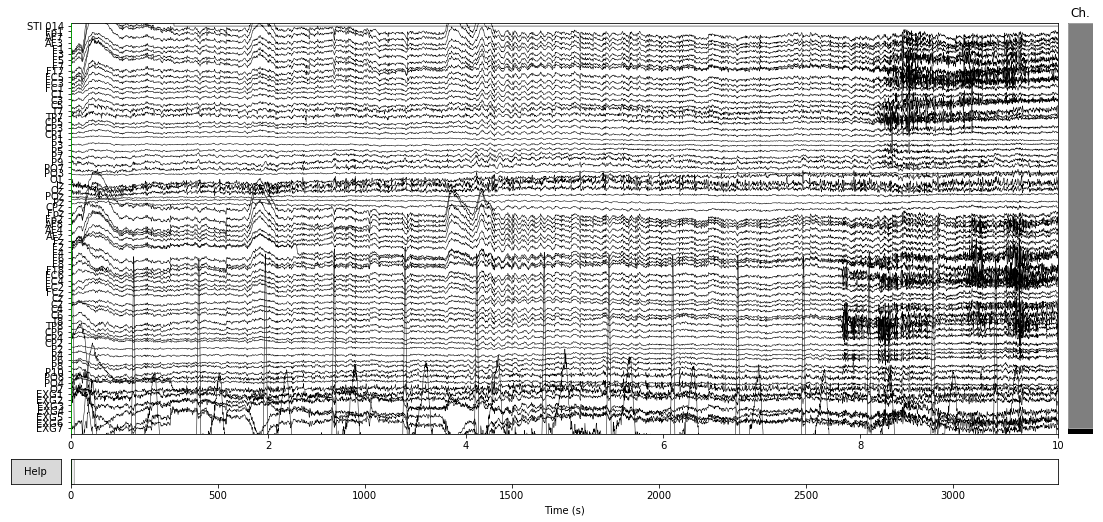

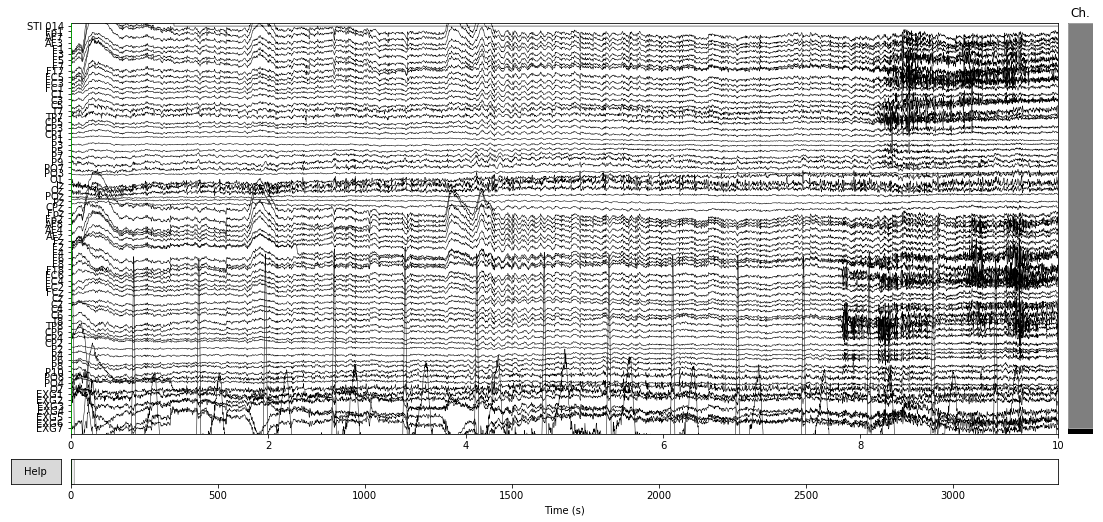

In [2]:
#import kai's test data
ROOT = '/home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/'
raw_file=ROOT+"spensertest2_14.bdf"
raw=mne.io.read_raw_edf(raw_file,preload=True)
raw.plot(n_channels=72)

# Re-reference, apply high and low pass filters (1 and 50)

Applying a custom EEG reference.
Setting up band-pass filter from 1 - 50 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 1691 samples (3.303 sec) selected


/data/backed_up/anaconda2/lib/python2.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


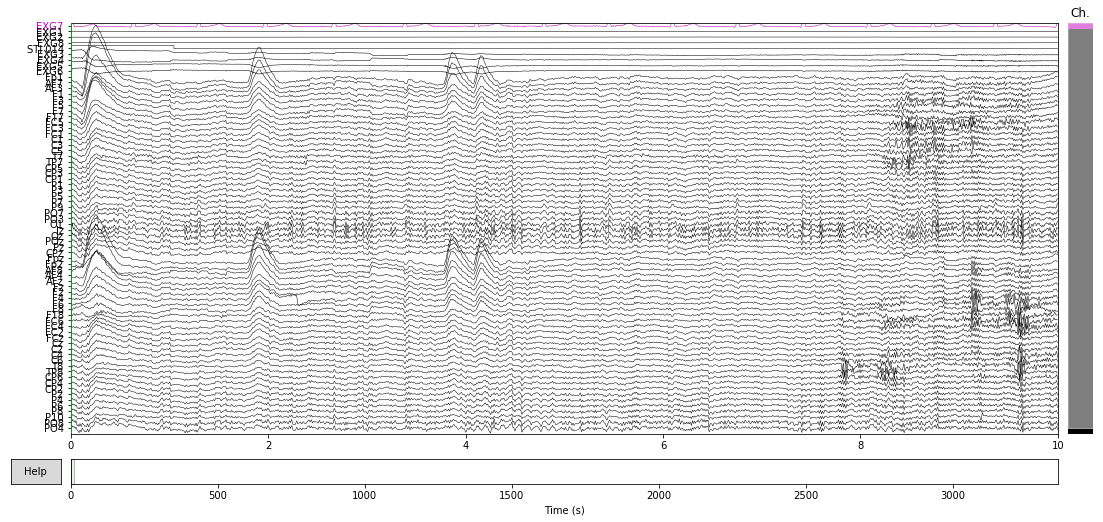

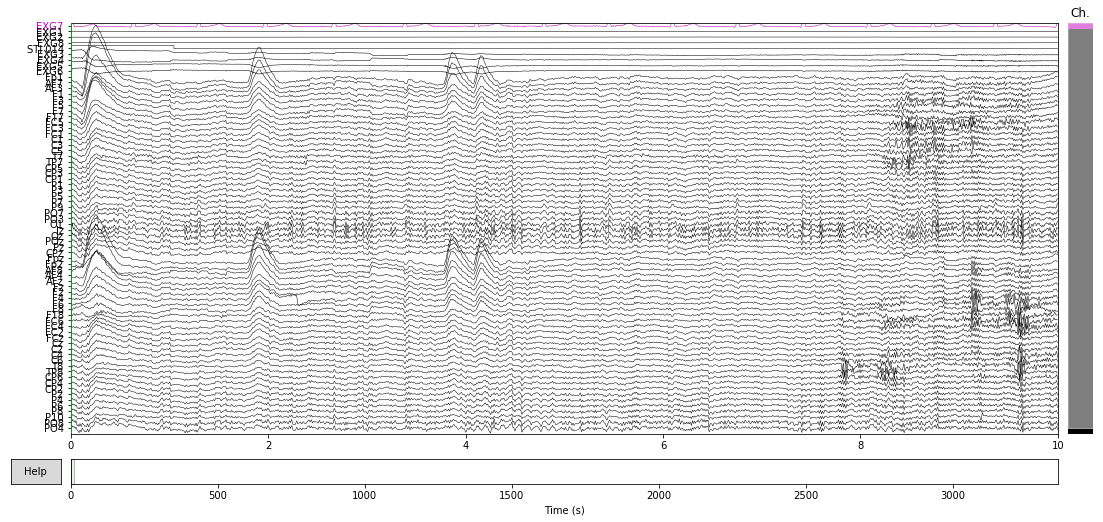

In [3]:
raw_f=raw.copy()
raw_f,r= mne.set_eeg_reference(raw_f,ref_channels=['EXG1', 'EXG2','EXG8'])#mastoids, nose
raw_f.set_channel_types({'EXG1':'emg','EXG2':'emg','EXG3':'eog','EXG4':'eog','EXG5':'eog','EXG6':'eog',
                        'EXG7':'ecg','EXG8':'emg'})
raw_f.filter(1,50)
raw_f.plot(n_channels=72)

In [4]:
raw_f.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, ...
    chs : list | 73 items (ECG: 1, EEG: 64, STIM: 1, EOG: 4, EMG: 3)
    comps : list | 0 items
    custom_ref_applied : bool | True
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : tuple | 2019-02-14 14:47:53 GMT
    nchan : int | 73
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : No

# Epoching into arbitrary 2-second windows

In [ ]:
#epoch_array=[]
#for t in raw_f.times[0::1024]:
 #   epoch_array.append([int(t),int(0),int(7)])  
    
#epoch_array=np.asarray(epoch_array)

In [ ]:
thispick=mne.pick_types(raw_f.info,meg=False,eeg=True,eog=True,emg=True,stim=True,ecg=True)

In [ ]:
#twoSec=mne.Epochs(raw_f,events=epoch_array,tmin=0,tmax=2,event_id={'twoSec':7},picks=thispick)

In [ ]:
#twoSec.plot(block=True) #selecting bad epochs to throw out
#twoSec.drop_bad()

In [ ]:
#eps=[]
#for e in twoSec:
 #   eps.append(e)
#raw_fe=mne.io.RawArray(eps[0],raw_f.info)
#raw_ar=[]
#for ep in eps[1:]:
#    ep=mne.io.RawArray(ep,raw_f.info)
#    raw_ar.append(ep)
#raw_fe.append(raw_ar)

#eps[1]

In [ ]:
#raw_fe.plot()

# Finding Events (triggers)

In [5]:
events = mne.find_events(raw_f, verbose=True)
##raw_f.info['events']
#event_ar=[]
#for event in events:
 #   sample=event[0]
#    if raw_fe.times[sample]==raw_f.times[sample]:
  #     one=sample
  #      event_ar.append([one,event[1],event[2]])
  #  else:
   #     try:
       #     one=list(raw_fe.times).index(raw_f.times[sample])
    #        event_ar.append([one,event[1],event[2]])
      #  except:
       #     continue
    
#raw_fe.info['events']=np.asarray(event_array)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
1208 events found
Event IDs: [  103   105   107   109   119   121   123   125   131   133   137   139
   254 65790]


In [ ]:
raw_fe=raw_f.copy() # raw_fe was originally the 2 epoched data
raw_fe.plot()

# ICA on Raw data

In [ ]:
EOG_channels=['EXG3', 'EXG4', 'EXG5', 'EXG6']
ECG_channels=['EXG7']

In [ ]:
our_picks=mne.pick_types(raw_fe.info,meg=False,eeg=True,eog=False)#exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'])
layout=mne.channels.read_montage('biosemi64')
#raw_f.set_montage(layout)
#plottables={}
#epAfterICA={}
#for cond in epCond.keys():
 #   thisEp=epCond[cond]  
  #  thisEp_i=thisEp.copy()
   # thisEp_i.load_data()
    #thisEp_i.set_montage(layout)
    #icaCond=ICA(n_components=25,random_state=25)
    #icaCond.fit(thisEp_i,picks=our_picks)
    
    #eog_ic=[]
    #for ch in EOG_channels:  # find IC's attributable to EOG artifacts
     #   eog_idx,scores=icaCond.find_bads_eog(thisEp,ch_name=ch)
      #  eog_ic.append(eog_idx)
    #ecg_ic=[]
    #for ch in ECG_channels: # find IC's attributable to ECG artifacts
     #   ecg_idx,scores=icaCond.find_bads_ecg(thisEp,ch_name=ch)
      #  ecg_ic.append(ecg_idx)
    #reject_ic=[]
    #for eog_inds in eog_ic:
     #   for ele in eog_inds:
      #      if ele not in reject_ic:
       #         reject_ic.append(ele)
    #for ecg_inds in ecg_ic:
     #   for ele in ecg_inds:
      #      if ele not in reject_ic:
       #         reject_ic.append(ele) #add these IC indices to the list of IC's to reject
    
    #icaCond.exclude=[]
    #icaCond.exclude.extend(reject_ic)
    #icaCond.plot_components(picks=range(25),ch_type='eeg',inst=thisEp) 
    #bad_ics=[] #list those identified by visual inspection
    #icaCond.exclude.extend(bad_ics)
    #icaCond.apply(thisEp_i)
    #plottables[cond]=icaCond
    #epAfterICA[cond]=thisEp_i

ica=ICA(n_components=64,random_state=25)
ica.fit(raw_fe,picks=our_picks)
raw_fe.set_montage(layout)
eog_ic=[]
for ch in EOG_channels:
    # find IC's attributable to EOG artifacts
    eog_idx,scores=ica.find_bads_eog(raw_fe,ch_name=ch)
    eog_ic.append(eog_idx)
#ecg_ic=[]
#for ch in ECG_channels: # find IC's attributable to ECG artifacts
 #   ecg_idx,scores=icaCond.find_bads_ecg(thisEp,ch_name=ch)
 #   ecg_ic.append(ecg_idx)
reject_ic=[]
for eog_inds in eog_ic:
    for ele in eog_inds:
        if ele not in reject_ic:
            reject_ic.append(ele)
#for ecg_inds in ecg_ic:
 #   for ele in ecg_inds:
  #      if ele not in reject_ic:
    #        reject_ic.append(ele) #add these IC indices to the list of IC's to reject
    
ica.exclude=[]
ica.exclude.extend(reject_ic)
ica.plot_components(picks=range(25),ch_type=None,inst=raw_fe)

raw_fei=raw_fe.copy()
ica.apply(raw_fei)
    
    
#def plot_diff(epoch,ica):
    #return ica.plot_overlay(epoch.average(),exclude=ica.exclude)

In [ ]:
# plotting before (RED) and after (BLACK) removal of IC's for that epoch 
#plot_diff(epCond['target5trig'],plottables['target5trig'])

ica.plot_overlay(raw_fe,exclude=ica.exclude)

# Looping through conditions, epoching

In [ ]:
event_id = {#'delay1trig':101,'probetrig':103,
            'target5trig':105,'target8trig':107,
            'dis5trig':109,'dis8trig':111}
            #'neutraltrig':113,'ITItrig':115}

tmin, tmax = -0.5, 2  #dont remember the window, making this up
baseline = (None, 0.0) #baseline correction applied with mne.Epochs
epCond={}
for event in event_id.keys():
    thisID={event:event_id[event]}
    epCond[event]=mne.Epochs(raw_f, events=events, event_id=thisID, tmin=tmin,
                    tmax=tmax)

In [ ]:
# Inspect and reject bad epochs, channels (keep eye blinks for ICA)

In [ ]:
#for cond in epCond.keys():
 #   thisEp=epCond[cond]
  #  thisEp.load_data()
   # # downsample???
    #thisEp.plot(block=True)
    #thisEp.drop_bad()
    #thisEp.info['bads']=[]
    # selecting bad electrodes
    #bads=[] #select bad electrodes by hand ? 
    #thisEp.info['bads']=bads
    #thisEp.interpolate_bads()


In [ ]:
epCond

In [ ]:
epCond['target5trig'].get_data()